In [1]:
# Importing the relevant libraries and API
import pandas as pd
pd.options.display.max_colwidth = 60
!pip install yfinance
import tensorflow as tf
from tensorflow import keras
import numpy as np
from numpy import mean
import yfinance as yf 

import numpy as np
from math import sqrt
import statistics
from sklearn.preprocessing import StandardScaler
import pylab


%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(20, 5)


In [2]:
# Get the data for the stock Facebook by specifying the stock ticker, start date, and end date 
data = yf.download('FB','2017-01-01','2020-01-01') 
# We use data.tail() to view the first 5 values from the dataset
data.head()



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [3]:
#Converting the data series into a dataframe (so we can replace missing values easily)
# We are only interested in the close price of each day
Input= data.Close.to_frame()
Input

,Close
Date,
2017-01-03,116.860001
2017-01-04,118.690002
2017-01-05,120.669998
2017-01-06,123.410004
2017-01-09,124.900002
...,...
2019-12-24,205.119995
2019-12-26,207.789993
2019-12-27,208.100006


Text(0, 0.5, 'Price')

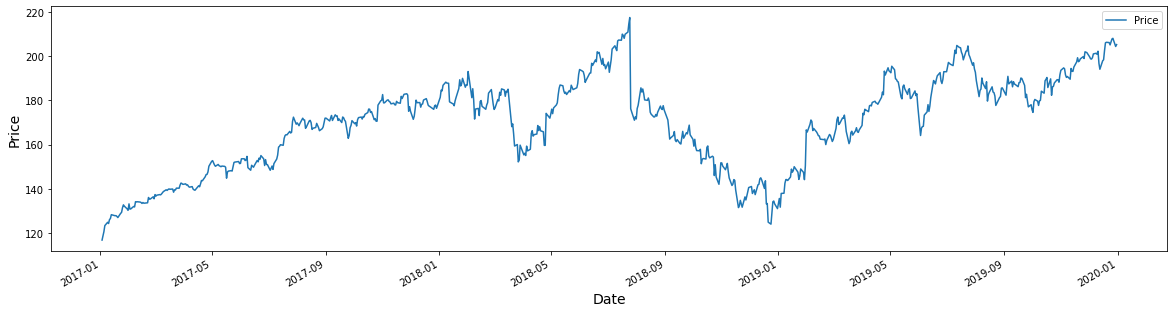

In [4]:

# Cleaning the input by replacing missing values with the previous value
clean_input= Input.fillna(method='ffill')
DATA = clean_input
# Renaming the price column from '0' to 'Price
DATA.rename(columns={'Close' :'Price'}, inplace=True )
# Plotting the data
DATA.plot()
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price',fontsize=14)


In [5]:
# We'll split training and test data as 80/20 respectively
# Getting the number of rows to train the model on. 
train_size= int(len(DATA)*0.8)
# The number of rows to test the model on
test_size= len(DATA) - train_size
#Splitting train and test data then printing the size (rows) of each
train, test = DATA.iloc[0:train_size], DATA.iloc[train_size:len(DATA)]
print(len(train),len(test))

        

603 151


In [6]:
# function:create_dataset
# converts data into numpy arrays
def create_dataset(X,y,time_steps=1):
    Xs, ys= [],[]
    for i in range(len(X)-time_steps):
        v= X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 1

# Splitting data into X_train and y_train datasets
# (train.Price and test.Price extracts the data from the train and test dataframe)
X_train, y_train = create_dataset(train, train.Price, time_steps)

# Scaling and standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))

# Splitting test data into X_test and y_test datasets
X_test, y_test = create_dataset(test, test.Price, time_steps)


In [8]:
# Reshaping the X_train_scaled array back into an 3d array
X_train_scaled=X_train_scaled.reshape(X_train.shape[0],1,1)

# Defining the LSTM network architecture
model=keras.Sequential( )
model.add(keras.layers.LSTM(128,input_shape=(X_train_scaled.shape[1],X_train_scaled.shape[2]
)))

model.add(keras.layers.Dense(1))



# Compile the model
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(0.001))

# Train the model (we use 250 iterations)
history= model.fit(X_train_scaled, y_train, epochs=250, batch_size=16,
                  validation_split= 0.1,verbose=1,shuffle=False)


Epoch 1/250
34/34 [==============================] - 3s 23ms/step - loss: 24214.1377 - val_loss: 31720.5781
Epoch 2/250
34/34 [==============================] - 0s 4ms/step - loss: 24154.5917 - val_loss: 31629.3359
Epoch 3/250
34/34 [==============================] - 0s 4ms/step - loss: 24066.2634 - val_loss: 31477.2422
Epoch 4/250
34/34 [==============================] - 0s 3ms/step - loss: 23920.8841 - val_loss: 31238.3594
Epoch 5/250
34/34 [==============================] - 0s 3ms/step - loss: 23697.7875 - val_loss: 30891.3086
Epoch 6/250
34/34 [==============================] - 0s 3ms/step - loss: 23380.8610 - val_loss: 30420.9121
Epoch 7/250
34/34 [==============================] - 0s 3ms/step - loss: 22959.9251 - val_loss: 29819.3613
Epoch 8/250
34/34 [==============================] - 0s 3ms/step - loss: 22431.4106 - val_loss: 29086.5039
Epoch 9/250
34/34 [==============================] - 0s 3ms/step - loss: 21798.1971 - val_loss: 28229.2832
Epoch 10/250
34/34 [================

Epoch 79/250
34/34 [==============================] - 0s 3ms/step - loss: 24.2182 - val_loss: 45.9025
Epoch 80/250
34/34 [==============================] - 0s 3ms/step - loss: 22.6142 - val_loss: 42.6024
Epoch 81/250
34/34 [==============================] - 0s 3ms/step - loss: 21.1859 - val_loss: 39.6433
Epoch 82/250
34/34 [==============================] - 0s 4ms/step - loss: 19.9237 - val_loss: 36.9891
Epoch 83/250
34/34 [==============================] - 0s 4ms/step - loss: 18.8177 - val_loss: 34.6072
Epoch 84/250
34/34 [==============================] - 0s 3ms/step - loss: 17.8580 - val_loss: 32.4691
Epoch 85/250
34/34 [==============================] - 0s 3ms/step - loss: 17.0343 - val_loss: 30.5493
Epoch 86/250
34/34 [==============================] - 0s 3ms/step - loss: 16.3365 - val_loss: 28.8256
Epoch 87/250
34/34 [==============================] - 0s 3ms/step - loss: 15.7540 - val_loss: 27.2775
Epoch 88/250
34/34 [==============================] - 0s 3ms/step - loss: 15.2766 

34/34 [==============================] - 0s 3ms/step - loss: 15.6607 - val_loss: 13.0579
Epoch 159/250
34/34 [==============================] - 0s 3ms/step - loss: 15.6382 - val_loss: 13.0366
Epoch 160/250
34/34 [==============================] - 0s 3ms/step - loss: 15.6156 - val_loss: 13.0153
Epoch 161/250
34/34 [==============================] - 0s 3ms/step - loss: 15.5930 - val_loss: 12.9939
Epoch 162/250
34/34 [==============================] - 0s 3ms/step - loss: 15.5704 - val_loss: 12.9725
Epoch 163/250
34/34 [==============================] - 0s 3ms/step - loss: 15.5478 - val_loss: 12.9510
Epoch 164/250
34/34 [==============================] - 0s 3ms/step - loss: 15.5251 - val_loss: 12.9295
Epoch 165/250
34/34 [==============================] - 0s 3ms/step - loss: 15.5024 - val_loss: 12.9079
Epoch 166/250
34/34 [==============================] - 0s 3ms/step - loss: 15.4797 - val_loss: 12.8863
Epoch 167/250
34/34 [==============================] - 0s 3ms/step - loss: 15.4569 - va

34/34 [==============================] - 0s 3ms/step - loss: 13.7856 - val_loss: 11.3558
Epoch 238/250
34/34 [==============================] - 0s 3ms/step - loss: 13.7603 - val_loss: 11.3359
Epoch 239/250
34/34 [==============================] - 0s 3ms/step - loss: 13.7350 - val_loss: 11.3160
Epoch 240/250
34/34 [==============================] - 0s 3ms/step - loss: 13.7096 - val_loss: 11.2962
Epoch 241/250
34/34 [==============================] - 0s 3ms/step - loss: 13.6841 - val_loss: 11.2765
Epoch 242/250
34/34 [==============================] - 0s 3ms/step - loss: 13.6587 - val_loss: 11.2569
Epoch 243/250
34/34 [==============================] - 0s 3ms/step - loss: 13.6333 - val_loss: 11.2373
Epoch 244/250
34/34 [==============================] - 0s 3ms/step - loss: 13.6078 - val_loss: 11.2179
Epoch 245/250
34/34 [==============================] - 0s 3ms/step - loss: 13.5823 - val_loss: 11.1985
Epoch 246/250
34/34 [==============================] - 0s 3ms/step - loss: 13.5567 - va

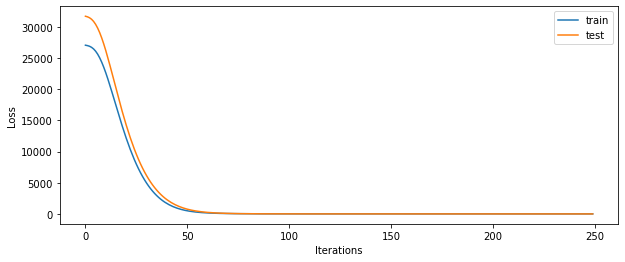

In [9]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label= 'train')
plt.plot(history.history['val_loss'], label= 'test')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend();

In [10]:
# Using the scaler to transform the test data. Also reshaping X_test as StandardScaler expects an 
# array dimension <= 2. (We have an 3 dimensional array)
X_test_scaled= scaler.transform(X_test.reshape(-1, 1))

# Reshaping the X_train_scaled array into an 3d array
X_test_scaled=X_test_scaled.reshape(X_test.shape[0],1,1)
# Get the models predicted price values
y_pred=model.predict(X_test_scaled)


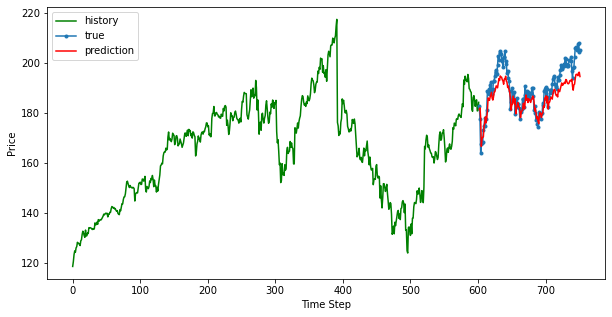

In [11]:

# Plot the predictions along with the true outcomes
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,len(y_train)), y_train, 'g',label="history")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test, marker='.',label="true")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred,  'r', label="prediction")

plt.ylabel('Price')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [12]:
# Showing the actual and predicted prices
actual= pd.DataFrame(y_test,columns= ['True'])
actual.insert(1, "Predicted", y_pred, True)

# Calculating the RMSE
rmse = sqrt(mean((y_pred-y_test)**2))
print(f'The root mean-squared-error is: {rmse}')
actual

The root mean-squared-error is: 11.669182687461157


,True,Predicted
0,183.009995,181.512558
1,177.470001,182.090851
2,164.149994,178.028259
3,167.500000,166.684143
4,168.169998,169.754944
...,...,...
145,205.119995,195.474274
146,207.789993,194.974487
147,208.100006,196.215164
148,204.410004,196.355362
